In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab
import scipy

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('D:/Python/Insight/NHL_player_rating/11-years_ratings.csv')

df.describe()

,Unnamed: 0,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
count,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000,9224.000000
mean,5264.124783,2012.997832,54.521791,0.663769,0.049175,0.081780,-0.003544,-0.000910,0.000053,0.104171,0.421816,1.316309,0.778005
std,3168.627163,3.174528,23.091396,0.416857,0.037612,0.048619,0.016760,0.004865,0.012638,0.055147,0.100235,0.480907,0.075504
min,2.000000,2008.000000,11.000000,-0.065858,0.000000,0.000000,-0.080800,-0.043412,-0.069840,0.002116,0.032501,0.112282,0.528041
25%,2547.750000,2010.000000,35.000000,0.347963,0.021551,0.044475,-0.013667,-0.002952,-0.001800,0.061207,0.357627,0.969010,0.724922
50%,5074.500000,2013.000000,60.000000,0.573189,0.035160,0.072613,-0.002187,-0.000729,0.000000,0.096224,0.417887,1.251191,0.777506
75%,7958.250000,2016.000000,76.000000,0.912809,0.071750,0.109972,0.007411,0.001440,0.000000,0.136309,0.483774,1.610809,0.833524
max,11198.000000,2018.000000,84.000000,2.783885,0.234997,0.341120,0.064725,0.032204,0.152280,0.342225,0.984621,3.570283,0.972623


In [4]:
df.drop(df[df.Gms <= 40].index, inplace=True)
df['toi_real'] = (df['TOI'] / 0.0004)**0.5
df['toi_real'] = df['toi_real'].round(2)


In [5]:
df.head()

,Unnamed: 0,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating,toi_real
0,2,abdelju01,Justin,Abdelkader,DET,US,LW,2010,50,0.222087,0.026240,0.199424,0.000000,0.001771,-0.00792,0.042849,0.365673,0.850124,0.700593,10.35
1,3,abdelju01,Justin,Abdelkader,DET,US,LW,2011,74,0.461893,0.034573,0.166659,-0.002659,0.000000,0.00864,0.059341,0.482409,1.210855,0.770450,12.18
2,4,abdelju01,Justin,Abdelkader,DET,US,LW,2012,81,0.480335,0.034015,0.119862,0.001620,0.004009,0.00936,0.059438,0.450255,1.158894,0.761132,12.19
3,5,abdelju01,Justin,Abdelkader,DET,US,LW,2013,48,0.494486,0.017767,0.164000,0.000000,0.001230,0.00180,0.083984,0.550854,1.314122,0.788202,14.49
4,6,abdelju01,Justin,Abdelkader,DET,US,LW,2014,70,0.699142,0.029051,0.161189,0.005623,0.003374,-0.00324,0.092052,0.443114,1.430305,0.806949,15.17


In [6]:
df['mins']=df['toi_real'].apply(lambda x: float(str(x).split('.')[0]))
df['secs']=df['toi_real'].apply(lambda x: float(str(x).split('.')[1])/60).round(2)
df['toi_real'] = df['mins'] + df['secs']
df.drop(['mins','secs'],axis=1)

,Unnamed: 0,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating,toi_real
0,2,abdelju01,Justin,Abdelkader,DET,US,LW,2010,50,0.222087,0.026240,0.199424,0.000000,0.001771,-0.00792,0.042849,0.365673,0.850124,0.700593,10.58
1,3,abdelju01,Justin,Abdelkader,DET,US,LW,2011,74,0.461893,0.034573,0.166659,-0.002659,0.000000,0.00864,0.059341,0.482409,1.210855,0.770450,12.30
2,4,abdelju01,Justin,Abdelkader,DET,US,LW,2012,81,0.480335,0.034015,0.119862,0.001620,0.004009,0.00936,0.059438,0.450255,1.158894,0.761132,12.32
3,5,abdelju01,Justin,Abdelkader,DET,US,LW,2013,48,0.494486,0.017767,0.164000,0.000000,0.001230,0.00180,0.083984,0.550854,1.314122,0.788202,14.82
4,6,abdelju01,Justin,Abdelkader,DET,US,LW,2014,70,0.699142,0.029051,0.161189,0.005623,0.003374,-0.00324,0.092052,0.443114,1.430305,0.806949,15.28
5,7,abdelju01,Justin,Abdelkader,DET,US,LW,2015,71,1.083006,0.025870,0.141363,-0.012011,0.001663,-0.00036,0.123201,0.493313,1.856045,0.864835,17.92
6,8,abdelju01,Justin,Abdelkader,DET,US,LW,2016,82,0.902187,0.035200,0.165600,-0.004800,-0.001080,-0.00144,0.133371,0.330047,1.559085,0.826222,18.43
7,9,abdelju01,Justin,Abdelkader,DET,US,LW,2017,64,0.587793,0.027675,0.147600,-0.003075,0.005535,-0.00252,0.107584,0.363184,1.233776,0.774479,16.07
8,10,abdelju01,Justin,Abdelkader,DET,US,LW,2018,75,0.824269,0.034987,0.152192,-0.011371,-0.001181,-0.00108,0.106668,0.422246,1.526730,0.821527,16.55
9,11,adamscr01,Craig,Adams,TOT,BN,RW,2008,75,0.264454,0.037611,0.102336,0.011371,0.000787,-0.00108,0.043932,0.266667,0.726079,0.673944,10.80


In [7]:
#float(str(df['toi_real'][19]).split('.')[1])/60

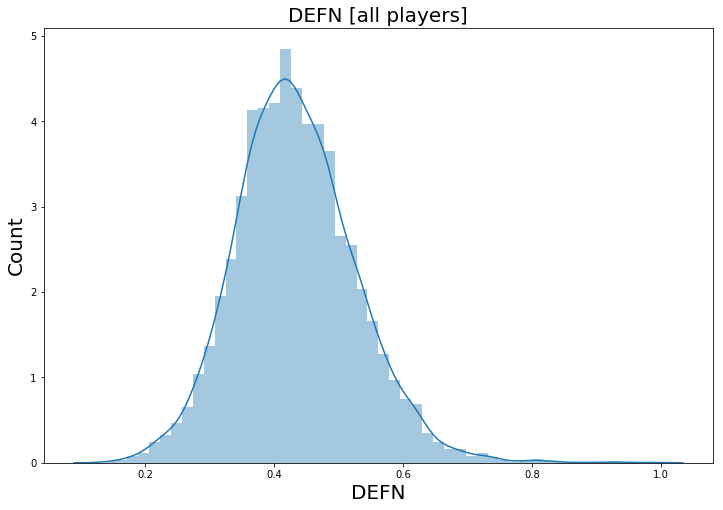

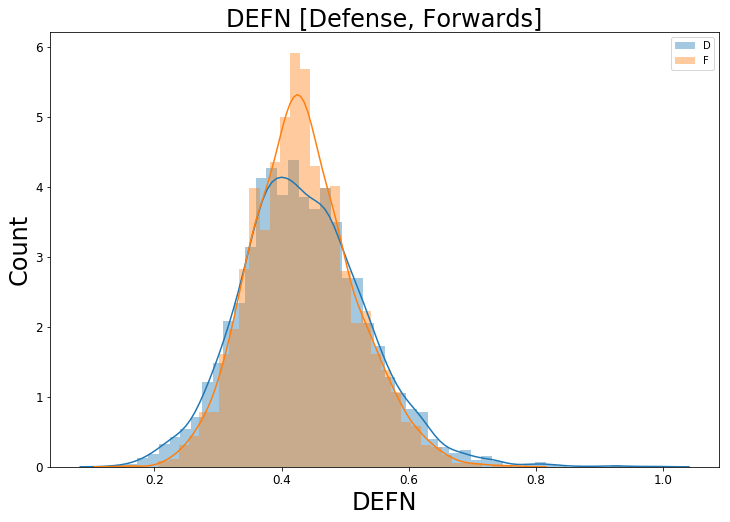

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df['DEFN'])
plt.xlabel('DEFN',size=20)
plt.ylabel('Count',size=20)
plt.title('DEFN [all players]',size=20)

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot((df[df['Position'] != 'D']).DEFN)
sns.distplot((df[df['Position'] == 'D']).DEFN)
plt.xlabel('DEFN',size=24)
plt.ylabel('Count',size=24)
plt.title('DEFN [Defense, Forwards]',size=24)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(['D','F'])
pylab.savefig('dist_DEFN.png')

In [9]:
(df[df['Position'] != 'D']).describe()

,Unnamed: 0,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating,toi_real,mins,secs
count,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000
mean,4968.364656,2013.023375,67.958859,0.825179,0.028645,0.078616,0.003446,0.000294,0.000385,0.093524,0.434302,1.464391,0.800840,15.052765,14.589762,0.463004
std,3140.069566,3.234996,12.824956,0.443650,0.013603,0.048813,0.013057,0.002835,0.018263,0.040075,0.098830,0.501589,0.073840,3.488792,3.493708,0.306913
min,2.000000,2008.000000,41.000000,0.000000,0.000000,0.003200,-0.066452,-0.011405,-0.069840,0.003672,0.139028,0.254159,0.563200,3.050000,3.000000,0.000000
25%,2362.250000,2010.000000,58.000000,0.467712,0.018907,0.041000,-0.004139,-0.001384,-0.004680,0.061901,0.368251,1.089541,0.748295,12.720000,12.000000,0.180000
50%,4644.500000,2013.000000,72.000000,0.772662,0.026776,0.068616,0.003322,0.000360,-0.001080,0.092903,0.428056,1.420290,0.805384,15.350000,15.000000,0.450000
75%,7565.750000,2016.000000,80.000000,1.127127,0.036246,0.105667,0.011166,0.001968,0.001080,0.122080,0.494286,1.798255,0.857936,17.770000,17.000000,0.730000
max,11181.000000,2018.000000,84.000000,2.677490,0.096213,0.321272,0.064725,0.015498,0.152280,0.235419,0.984621,3.534288,0.971648,24.430000,24.000000,0.980000


In [10]:
(df[df['Position'] == 'D']).describe()

,Unnamed: 0,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating,toi_real,mins,secs
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,5071.661468,2012.931193,66.616055,0.606431,0.096622,0.088861,-0.017572,-0.002567,-0.000029,0.160233,0.433057,1.365035,0.790253,19.903739,19.443578,0.460161
std,3047.237914,3.235422,12.977292,0.303512,0.031232,0.047759,0.014181,0.002719,0.000214,0.051741,0.080485,0.369031,0.056306,3.293956,3.306165,0.308558
min,28.000000,2008.000000,41.000000,0.028678,0.015138,0.001339,-0.080800,-0.016773,-0.003240,0.033856,0.158579,0.564605,0.637517,9.030000,9.000000,0.000000
25%,2423.500000,2010.000000,56.000000,0.381192,0.074825,0.051200,-0.026074,-0.004163,0.000000,0.120132,0.378268,1.094300,0.749191,17.520000,17.000000,0.180000
50%,4824.500000,2013.000000,69.000000,0.535131,0.094400,0.079168,-0.016400,-0.002415,0.000000,0.160721,0.428434,1.301313,0.786056,20.030000,20.000000,0.450000
75%,7670.250000,2016.000000,79.000000,0.791911,0.115429,0.118289,-0.008088,-0.000720,0.000000,0.197491,0.482651,1.596666,0.831552,22.370000,22.000000,0.730000
max,11198.000000,2018.000000,84.000000,1.907223,0.234997,0.341120,0.030197,0.005821,0.001080,0.342225,0.762567,2.779081,0.941535,29.420000,29.000000,0.980000


In [11]:
df['Rating'] = df['Rating']*100

In [12]:
df.loc[(df.Position.str.startswith('W'))]
df['Position'].replace('W�','LW',inplace=True)

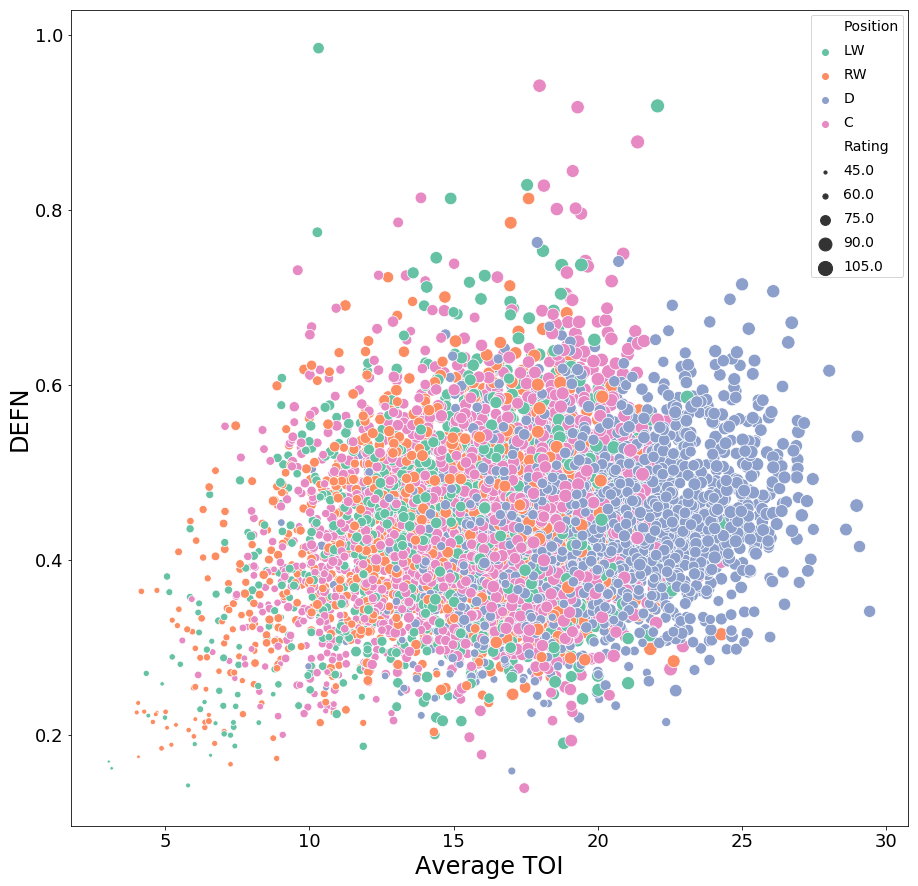

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="toi_real", y="DEFN", hue="Position", size="Rating",sizes=(10, 200), palette="Set2", legend="brief",data=df)
plt.ylabel('DEFN',size=24)
plt.xlabel('Average TOI',size=24)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(labelspacing=1)
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title
pylab.savefig('DEFN_scatter.png')

# DEFN for forwards only

In [14]:
dff = df[df['Position'] != 'D']
data = np.array(dff[['toi_real','DEFN']])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)


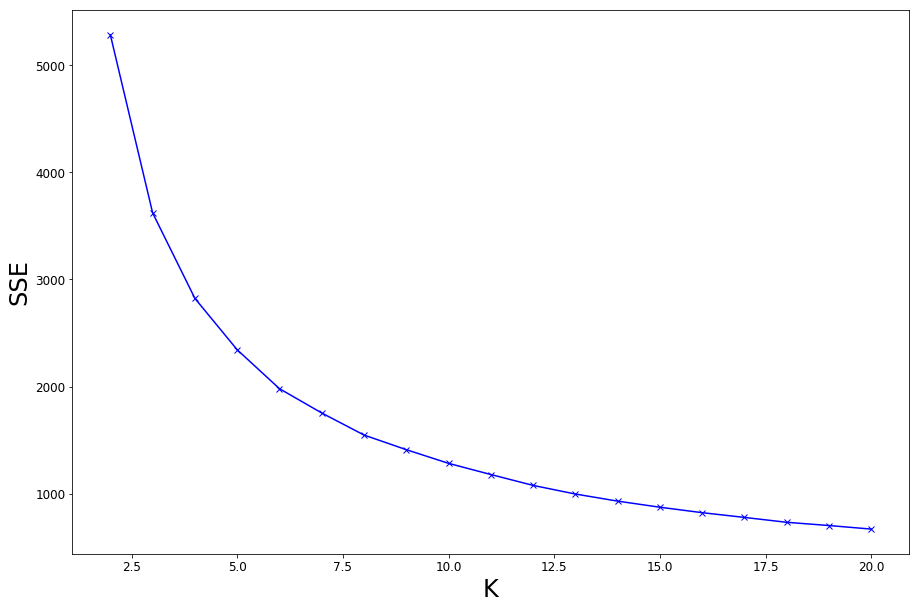

In [15]:
# When K increases, the centroids are closer to the clusters centroids.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
# The improvements will decline, at some point rapidly, creating the elbow shape.

from scipy.spatial.distance import cdist
distortions = []
sse=[]
K = range(2,21)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_data)
    kmeanModel.fit(scaled_data)
    distortions.append(sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])
    sse.append(kmeanModel.inertia_)
    preds = kmeanModel.predict(scaled_data)
    labels = kmeanModel.labels_
    #score = silhouette_score(scaled_data, labels, metric='euclidean')
    #print("For n_clusters = {}, silhouette score is : {})".format(k, score))
    
#sse = sse/max(sse)  
#K = np.array(list(range(2,15))) / 14
# Plot the elbow
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(K, sse, 'bx-')
plt.xlabel('K', size=24)
plt.ylabel('SSE',size=24)
ax.tick_params(axis='both', which='major', labelsize=12)
pylab.savefig('Elbow_forwards.png')
plt.show()

In [16]:
from scipy.spatial import distance
a = (0,0)
b = [K[4],sse[4]]
dst = distance.euclidean(a,b)
print(dst)

1979.800166097387


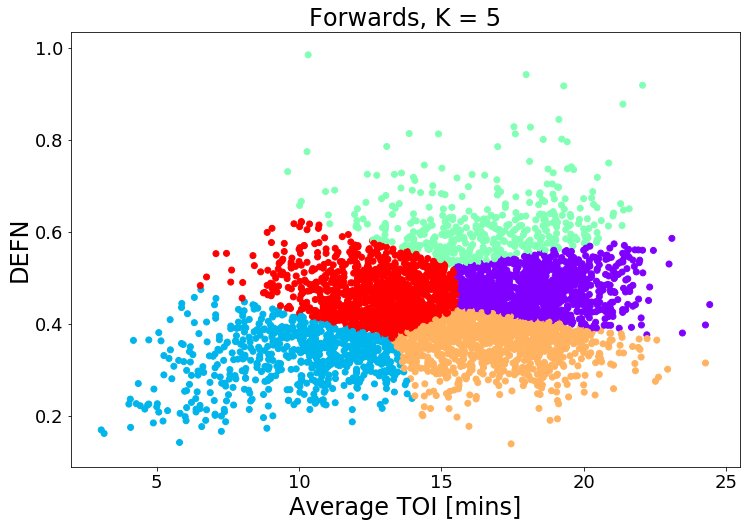

In [17]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(scaled_data)
kmeans.cluster_centers_
labels = kmeans.labels_

f, (ax1) = plt.subplots(1, sharey=True,figsize=(12,8))
ax1.set_title('Forwards, K = 5', size=24)
ax1.scatter(data[:,0],data[:,1],c=kmeans.labels_,cmap='rainbow')
ax1.set_xlabel('Average TOI [mins]',size=24) 
ax1.set_ylabel('DEFN',size=24)
ax1.tick_params(axis='both', which='major', labelsize=18)
pylab.savefig('for_k5.png') 

In [18]:
dff['Tier'] = [np.nan]*len(dff)
dff['Tier'].loc[dff['Position'] != 'D'] = labels

In [22]:
best_df = dff[dff['Tier'] == 2]
print('Total players in this Category: ' + str(len(best_df['Code'].unique())))
best_df = best_df[best_df['Rating'] >= 90].reset_index(drop=True)
#best_df['Code'].value_counts()
Tier1_f = best_df.groupby(['Code','First_name','Last_name','Position'], as_index=False).size().sort_values(ascending=False).reset_index(name='count')


Tier1_f.to_csv('Tier1_for.csv')
Tier1_f

Total players in this Category: 230


,Code,First_name,Last_name,Position,count
0,bergepa01,Patrice,Bergeron,C,7
1,datsypa01,Pavel,Datsyuk,C,7
2,kopitan01,Anze,Kopitar,C,6
3,thornjo01,Joe,Thornton,C,6
4,paveljo01,Joe,Pavelski,C,5
5,keslery01,Ryan,Kesler,C,4
6,zettehe01,Henrik,Zetterberg,LW,4
7,marchbr03,Brad,Marchand,LW,3
8,backeda01,David,Backes,C,3
9,perryco01,Corey,Perry,RW,3


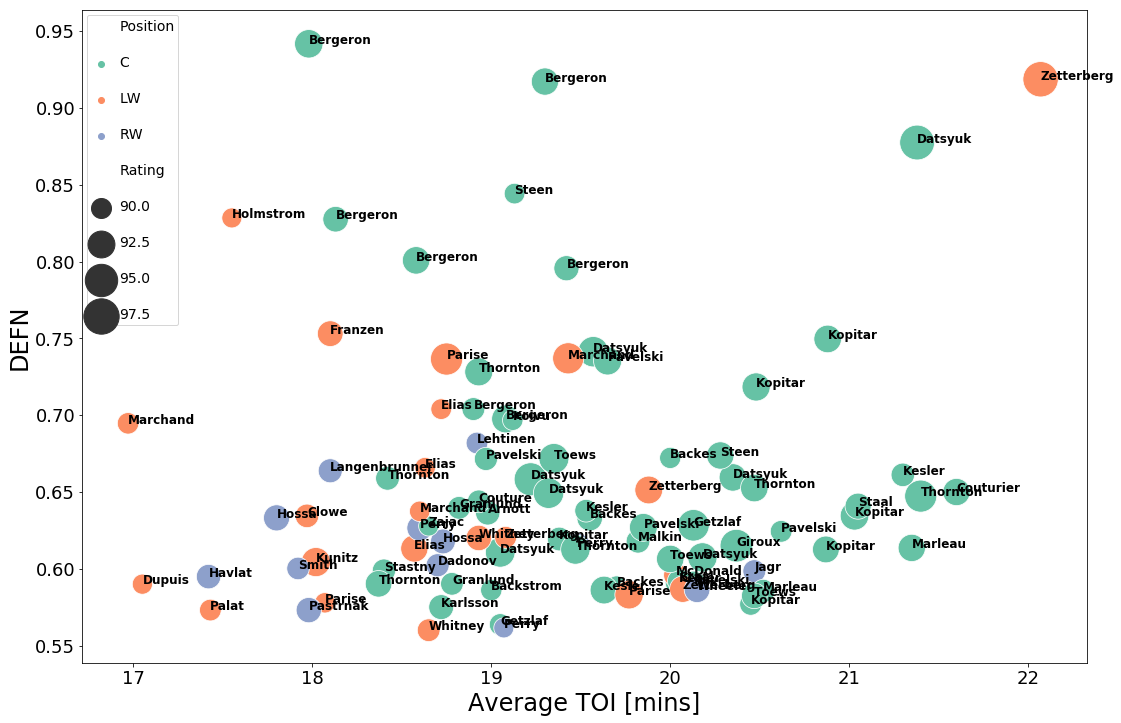

In [23]:
plt.subplots(figsize=(18,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True) 
ax = sns.scatterplot(x="toi_real", y="DEFN", hue="Position", size="Rating",sizes=(400, 1250), palette="Set2", data=best_df) 
for line in range(0,best_df.shape[0]): 
    ax.text(best_df.toi_real[line], best_df.DEFN[line], best_df.Last_name[line], horizontalalignment='left', size='large', color='black', weight='semibold') 
plt.xlabel('Average TOI [mins]',size=24) 
plt.ylabel('DEFN',size=24) 
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(labelspacing=2.2)
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

pylab.savefig('best_df.png')



# DEFN for D-men

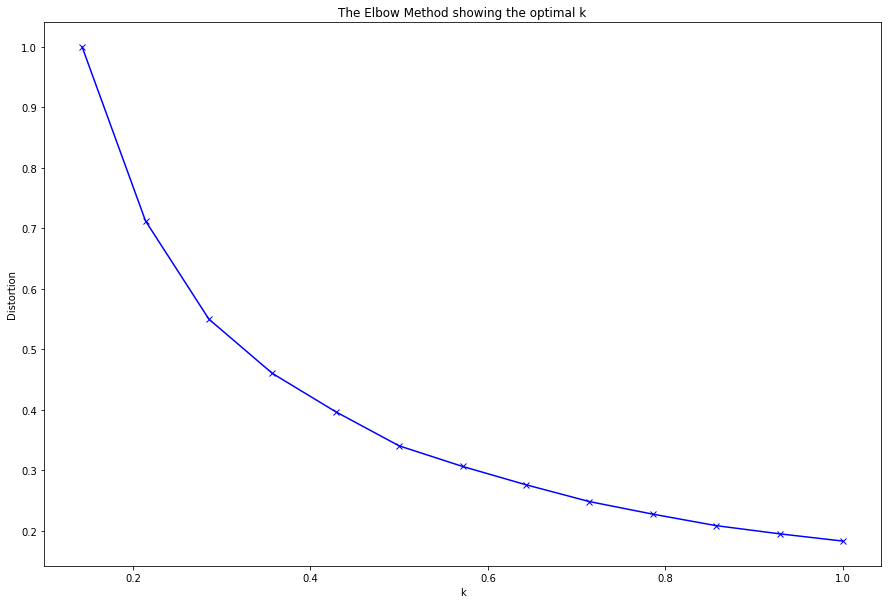

In [20]:
dfd = df[df['Position'] == 'D']
data = np.array(dfd[['toi_real','DEFN']])

scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

# When K increases, the centroids are closer to the clusters centroids.
# The improvements will decline, at some point rapidly, creating the elbow shape.

from scipy.spatial.distance import cdist
distortions = []
sse=[]
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_data)
    kmeanModel.fit(scaled_data)
    distortions.append(sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])
    sse.append(kmeanModel.inertia_)
    preds = kmeanModel.predict(scaled_data)
    labels = kmeanModel.labels_
    #score = silhouette_score(scaled_data, labels, metric='euclidean')
    #print("For n_clusters = {}, silhouette score is : {})".format(k, score))

sse = sse/max(sse)  
K = np.array(list(range(2,15))) / 14    
# Plot the elbow
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
from scipy.spatial import distance
a = (0,0)
b = [K[3],sse[3]]
dst = distance.euclidean(a,b)
print(dst)

0.5823877338225316


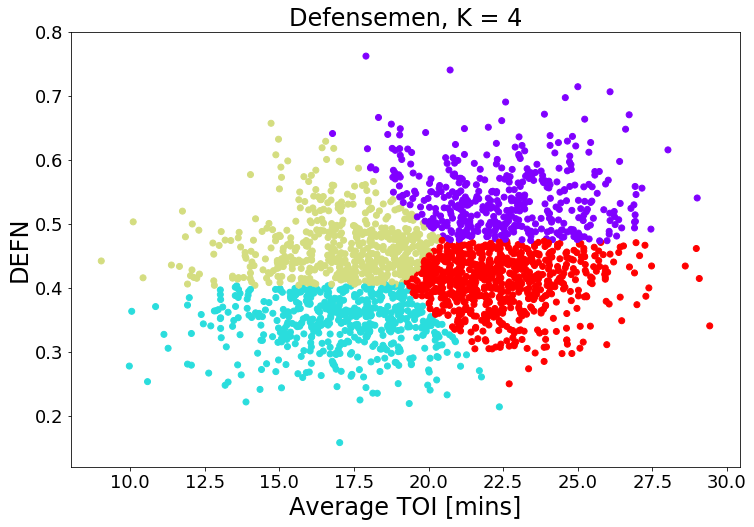

In [22]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(scaled_data)
kmeans.cluster_centers_
labels = kmeans.labels_

f, (ax1) = plt.subplots(1, sharey=True,figsize=(12,8))
ax1.set_title('Defensemen, K = 4', size=24)
ax1.scatter(data[:,0],data[:,1],c=kmeans.labels_,cmap='rainbow')
ax1.set_xlabel('Average TOI [mins]',size=24) 
ax1.set_ylabel('DEFN',size=24)
ax1.tick_params(axis='both', which='major', labelsize=18)
pylab.savefig('def_k5.png') 

In [23]:
dfd['Tier'] = [np.nan]*len(dfd)
dfd['Tier'].loc[dfd['Position'] == 'D'] = labels

In [31]:
best_dd = dfd[dfd['Tier'] == 0]
print('Total players in this Category: ' + str(len(best_dd['Code'].unique())))
best_dd = best_dd[best_dd['Rating'] >= 88].reset_index(drop=True)
#best_df['Code'].value_counts()
Tier1_d = best_dd.groupby(['Code','First_name','Last_name','Position','Nation'], as_index=False).size().sort_values(ascending=False).reset_index(name='count')

Tier1_d.to_csv('Tierd_def.csv')
Tier1_d

Total players in this Category: 165


,Code,First_name,Last_name,Position,Nation,count
0,webersh01,Shea,Weber,D,CA,7
1,charazd01,Zdeno,Chara,D,CS,6
2,letankr01,Kris,Letang,D,CA,6
3,doughdr01,Drew,Doughty,D,CA,6
4,keithdu01,Duncan,Keith,D,CA,5
5,josiro01,Roman,Josi,D,CH,4
6,byfugdu01,Dustin,Byfuglien,D,US,4
7,lidstni01,Nicklas,Lidstrom,D,SE,3
8,boyleda01,Dan,Boyle,D,CA,3
9,burnsbr01,Brent,Burns,D,CA,3


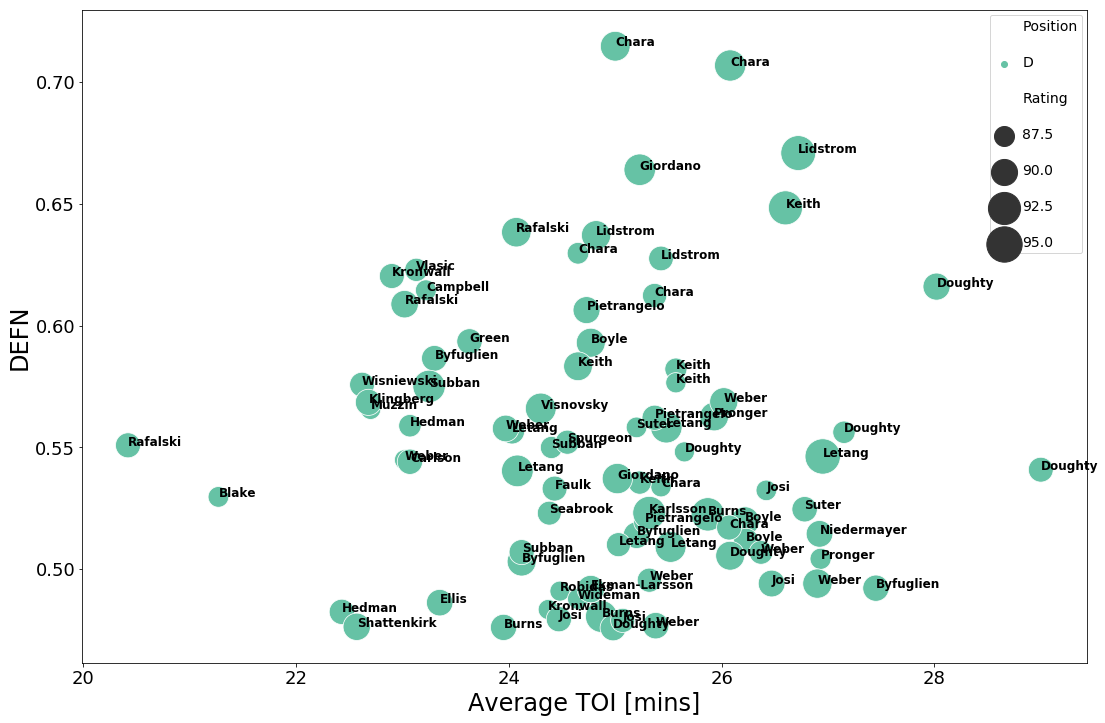

In [67]:
plt.subplots(figsize=(18,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True) 
ax = sns.scatterplot(x="toi_real", y="DEFN", hue="Position", size="Rating",sizes=(400, 1250), palette="Set2", data=best_dd) 
for line in range(0,best_dd.shape[0]): 
    ax.text(best_dd.toi_real[line], best_dd.DEFN[line], best_dd.Last_name[line], horizontalalignment='left', size='large', color='black', weight='semibold') 
plt.xlabel('Average TOI [mins]',size=24) 
plt.ylabel('DEFN',size=24) 
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(labelspacing=2.2)
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

pylab.savefig('best_dd.png')

In [68]:
dfd[dfd['Last_name'] == 'Pietrangelo']

,Unnamed: 0,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,...,PEN,FO,TOI,DEFN,GSS_adj,Rating,toi_real,mins,secs,Tier
5706,6384,pietral01,Alex,Pietrangelo,STL,CA,D,2011,79,1.033464,...,0.001868,0.00000,0.193600,0.540640,1.920701,87.221658,22.00,22.0,0.00,0
5707,6385,pietral01,Alex,Pietrangelo,STL,CA,D,2012,81,1.199865,...,0.000000,0.00000,0.238925,0.606375,2.233867,90.324985,24.73,24.0,0.73,0
5708,6386,pietral01,Alex,Pietrangelo,STL,CA,D,2013,47,0.991432,...,0.003140,0.00000,0.251402,0.449015,1.868061,86.623380,25.12,25.0,0.12,3
5709,6387,pietral01,Alex,Pietrangelo,STL,CA,D,2014,81,1.189257,...,-0.000364,0.00000,0.254419,0.562171,2.160170,89.661526,25.37,25.0,0.37,0
5710,6388,pietral01,Alex,Pietrangelo,STL,CA,D,2015,81,1.058796,...,0.001822,0.00000,0.255025,0.408885,1.907560,87.074475,25.42,25.0,0.42,3
5711,6389,pietral01,Alex,Pietrangelo,STL,CA,D,2016,73,0.983072,...,0.002426,0.00000,0.274157,0.481369,1.908169,87.081329,26.30,26.0,0.30,0
5712,6390,pietral01,Alex,Pietrangelo,STL,CA,D,2017,80,1.121976,...,-0.001107,-0.00036,0.253412,0.519395,2.075355,88.848465,25.28,25.0,0.28,0
5713,6391,pietral01,Alex,Pietrangelo,STL,CA,D,2018,78,1.283158,...,0.001892,0.00000,0.258877,0.433876,2.167034,89.724986,25.73,25.0,0.73,3


In [33]:
players = dfd[(dfd['Year']==2018) & (dfd['Rating']>=88)].sort_values(by=['DEFN','Rating'], ascending=False)
players.columns

Index(['Unnamed: 0', 'Code', 'First_name', 'Last_name', 'Team', 'Nation',
       'Position', 'Year', 'Gms', 'P_adj', 'BLK', 'HIT', 'GWY', 'PEN', 'FO',
       'TOI', 'DEFN', 'GSS_adj', 'Rating', 'toi_real', 'mins', 'secs', 'Tier'],
      dtype='object')

In [34]:
players.drop(['Unnamed: 0','Team', 'Nation','Position', 'BLK', 'HIT', 'GWY', 'PEN', 'FO','GSS_adj','mins','secs','Tier'],axis=1)

,Code,First_name,Last_name,Year,Gms,P_adj,TOI,DEFN,Rating,toi_real
7033,spurgja01,Jared,Spurgeon,2018,61,1.121953,0.236780,0.552142,89.270366,24.55
4574,suterry01,Ryan,Suter,2018,78,1.205287,0.280264,0.524607,89.747232,26.78
2669,letankr01,Kris,Letang,2018,79,1.208001,0.254016,0.510064,89.266751,25.03
6492,subbapk01,P.K.,Subban,2018,82,1.302008,0.231746,0.507005,89.625402,24.12
5382,doughdr01,Drew,Doughty,2018,82,1.384931,0.280900,0.505523,91.081232,26.08
7278,ellisry01,Ryan,Ellis,2018,44,1.343969,0.215482,0.486245,90.142848,23.35
7384,josiro01,Roman,Josi,2018,75,1.296848,0.235807,0.479468,89.671971,24.47
8562,klingjo01,John,Klingberg,2018,82,1.474186,0.231169,0.455673,90.321485,24.07
8167,jonesse01,Seth,Jones,2018,78,1.348583,0.237364,0.454507,90.303845,24.60
6247,hedmavi01,Victor,Hedman,2018,77,1.458817,0.260304,0.452323,91.390205,25.85


# Norris time series

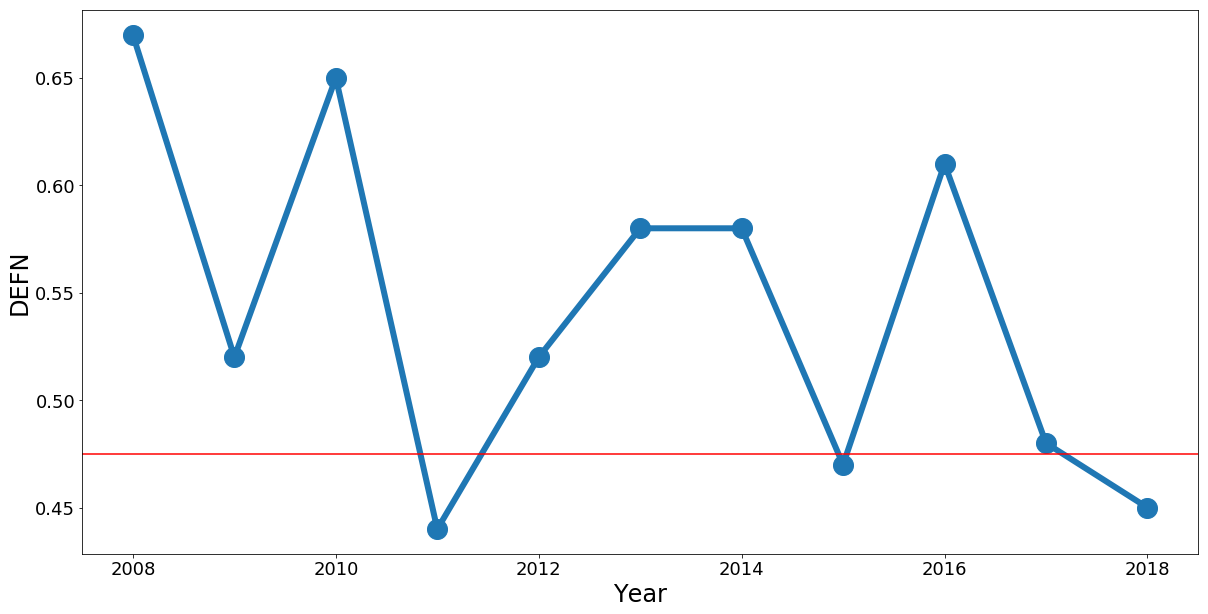

In [66]:
x = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
y = [0.67, 0.52, 0.65,0.44, 0.52,0.58,0.58,0.47,0.61,0.48,0.45]
z=[93.8,89.6,93.4,89, 92.9,92.6,91,91,90,92.4,91.4]
Tier = [1,1,1,2,1,1,1,2,1,1,2]

d = {'Year': x, 'DEFN': y, 'Rating': z, 'Tier': Tier}

series = pd.DataFrame(data=d)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x,y,'o-',linewidth=6, markersize=20)
plt.xlabel('Year', size=24)
plt.ylabel('DEFN',size=24)
ax.axhline(y=0.475, xmin=0.0, xmax=1.0, color='r')
ax.tick_params(axis='both', which='major', labelsize=18)
pylab.savefig('Norris_TS.png')


# For plotting purposes

In [86]:
Tier1F= pd.read_csv('D:/Python/Insight/NHL_player_rating/Tier1_for_win.csv')
Tier1F['Selke Wins'].astype(int)
Tier1F.sort_values(by=['count','Top-3 Nominee'], ascending=False).reset_index(drop=True)

,Code,First_name,Last_name,Position,count,Selke Wins,Top-3 Nominee
0,bergepa01,Patrice,Bergeron,C,7,4,7
1,datsypa01,Pavel,Datsyuk,C,7,3,6
2,kopitan01,Anze,Kopitar,C,6,2,4
3,thornjo01,Joe,Thornton,C,6,0,0
4,paveljo01,Joe,Pavelski,C,5,0,0
5,keslery01,Ryan,Kesler,C,4,1,5
6,zettehe01,Henrik,Zetterberg,LW,4,0,1
7,toewsjo01,Jonathan,Toews,C,3,1,3
8,backeda01,David,Backes,C,3,0,1
9,marchbr03,Brad,Marchand,LW,3,0,0


In [91]:
Tier1D= pd.read_csv('D:/Python/Insight/NHL_player_rating/Tierd_def_wins.csv')
Tier1D['Norris Wins'].astype(int)
Tier1D.sort_values(by=['count','Norris Wins','Top-3 Nominee'], ascending=False).reset_index(drop=True)

,Code,First_name,Last_name,Position,Nation,count,Norris Wins,Top-3 Nominee,Norris Tier-2 Win
0,webersh01,Shea,Weber,D,CA,7,0,3,0
1,charazd01,Zdeno,Chara,D,CS,6,1,5,0
2,doughdr01,Drew,Doughty,D,CA,6,1,4,0
3,letankr01,Kris,Letang,D,CA,6,0,1,0
4,keithdu01,Duncan,Keith,D,CA,5,2,2,0
5,josiro01,Roman,Josi,D,CH,4,0,0,0
6,byfugdu01,Dustin,Byfuglien,D,US,4,0,0,0
7,subbapk01,P.K.,Subban,D,CA,3,1,3,0
8,lidstni01,Nicklas,Lidstrom,D,SE,3,1,2,1
9,burnsbr01,Brent,Burns,D,CA,3,1,2,0
